In [9]:
import pandas as pd
import numpy as np

from pathlib import Path

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset_csv_path = Path('data/news/20newsgroup_preprocessed.csv')

dataset_csv_path.is_file()

True

In [3]:
df = pd.read_csv(dataset_csv_path, delimiter=';')

## EDA

In [4]:
df.head()

,target,text,text_cleaned
0,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: A...,atheist resources addresses atheist organizati...
1,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: A...,begin pgp signed message introduction atheism ...
2,alt.atheism,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,article charley wingate writes well john quite...
3,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: R...,kings become philosophers philosophers become ...
4,alt.atheism,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,article bob mcgwier writes however hate econom...


In [5]:
df.columns

Index(['target', 'text', 'text_cleaned'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18828 entries, 0 to 18827
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   target        18828 non-null  object
 1   text          18828 non-null  object
 2   text_cleaned  18792 non-null  object
dtypes: object(3)
memory usage: 441.4+ KB


In [7]:
text_column = 'text_cleaned'
label_column = 'target'

In [39]:
df = df.drop_duplicates(text_column)
df = df[df[text_column].map(lambda _text: isinstance(_text, str) and len(_text.strip()) > 0)]

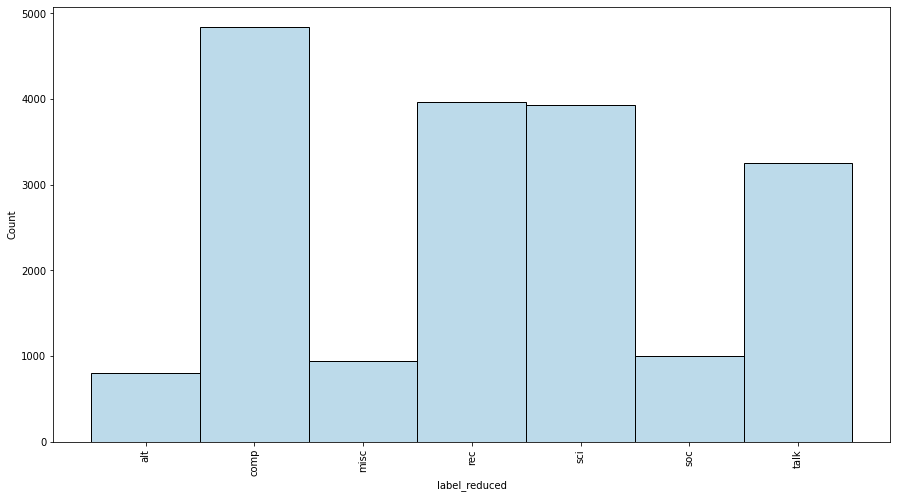

In [40]:
plt.figure(figsize = (15,8))
ax = sns.histplot(df[label_column]);#.value_counts().plot(kind='bar');
plt.xticks(rotation = 90);


In [41]:
def reduce_label(label):
    split_label = label.split('.')
    if len(split_label) >= 1:
        return '.'.join(split_label[:1])

df['label_reduced'] = df[label_column].map(reduce_label)

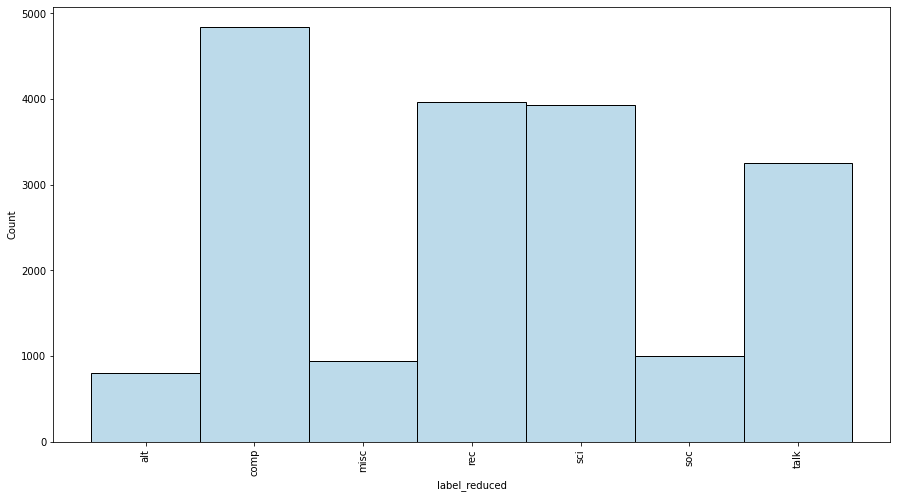

In [42]:
plt.figure(figsize = (15,8))
ax = sns.histplot(df['label_reduced']);#.value_counts().plot(kind='bar');
plt.xticks(rotation = 90);


## Split datasets

Lengths:   dataset_type  lengths
0        train    13104
1          val     2808
2         test     2808


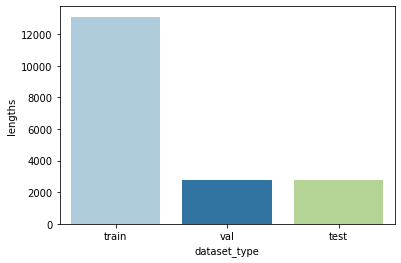

In [49]:
X_train, X_test = train_test_split(
    df,
    test_size=0.3,
    shuffle=True
)

X_val, X_test = train_test_split(
    X_test,
    test_size=0.5,
    shuffle=True
)


lengths_df = pd.DataFrame.from_dict({
    'train': [len(X_train)],
    'val': [len(X_val)],
    'test': [len(X_test)]
})
lengths_df = lengths_df.transpose().reset_index()
lengths_df.columns = ['dataset_type', 'lengths']

print(f'Lengths: {lengths_df}')

sns.barplot(x='dataset_type', y='lengths', data=lengths_df);

In [50]:
X_train[label_column].unique()

array(['soc', 'comp', 'alt', 'talk', 'rec', 'sci', 'misc'], dtype=object)

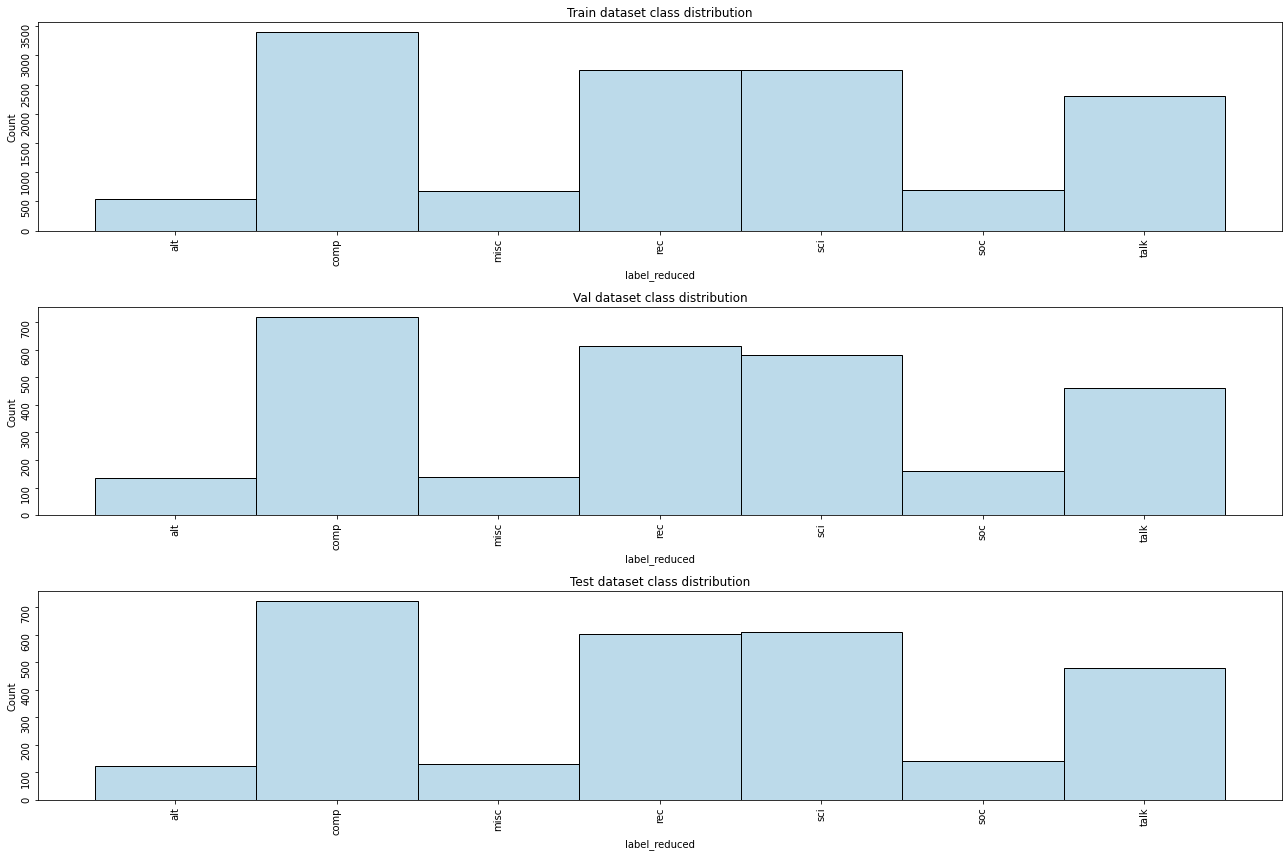

In [51]:
label_column = 'label_reduced'

unique_values = sorted(X_train[label_column].unique())

X_train[label_column] = pd.Categorical(X_train[label_column], unique_values)
X_val[label_column] = pd.Categorical(X_val[label_column], unique_values)
X_test[label_column] = pd.Categorical(X_test[label_column], unique_values)

sns.set_palette("Paired")
f, axs = plt.subplots(3, 1, figsize=(18, 12), gridspec_kw=dict(height_ratios=[6, 6, 6]))
sns.histplot(data=X_train[label_column], ax=axs[0])
axs[0].set_title('Train dataset class distribution')
sns.histplot(data=X_val[label_column], ax=axs[1])
axs[1].set_title('Val dataset class distribution')
sns.histplot(data=X_test[label_column], ax=axs[2])
axs[2].set_title('Test dataset class distribution')

axs[0].tick_params(rotation=90)
axs[1].tick_params(rotation=90)
axs[2].tick_params(rotation=90)


f.tight_layout()


# X_train['airline_sentiment'].value_counts().plot(kind='bar');

In [52]:
X_train = X_train[[label_column, text_column]].reset_index(drop=True)
X_val = X_val[[label_column, text_column]].reset_index(drop=True)
X_test = X_test[[label_column, text_column]].reset_index(drop=True)

save_path = dataset_csv_path.parent


X_train.to_csv(save_path /'train.csv', header=True, index=False)
X_val.to_csv(save_path / 'val.csv', header=True, index=False)
X_test.to_csv(save_path / 'test.csv', header=True, index=False)

In [47]:
X_test

,label_reduced,text_cleaned
0,misc,hello package right thing planning short vacat...
1,talk,article jim de arras writes article dusek shal...
2,soc,dave bernard writes elizabeth greeted mary eli...
3,rec,michael collingridge writes subject captain ev...
4,comp,remember someone mention meg syquest anyone el...
...,...,...
2803,talk,article jack schmidling writes neither times t...
2804,talk,paul e reimer writes lot automobile accidents ...
2805,sci,article writes might look allergy doctor area ...
2806,comp,danny backx writes yes bug x r port xterm some...
